<a href="https://colab.research.google.com/github/Sazzadcse2024/lab-manual/blob/master/LabReport_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = {
    'text': ["Goal scored in final minutes"] * 50 + ["Election results announced today"] * 50,
    'label': [0] * 50 + [1] * 50  # 0: Sports, 1: Politics
}
df = pd.DataFrame(data)

In [3]:
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text.strip()

df['cleaned'] = df['text'].apply(clean_text)

In [4]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['cleaned'])
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [6]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



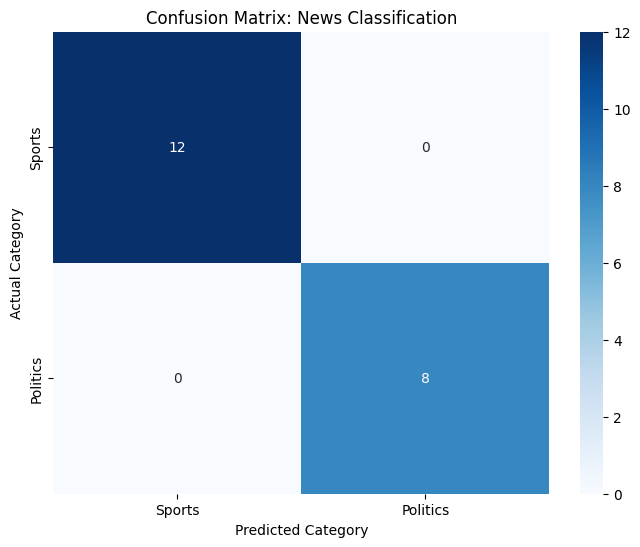

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sports', 'Politics'],
            yticklabels=['Sports', 'Politics'])
plt.title('Confusion Matrix: News Classification')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()